In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/201901-202003.csv")
data = data.fillna('')

In [ ]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [ ]:
data['REG_YYMM']

0           201901
1           201901
2           201901
3           201901
4           201901
             ...  
24697787    202003
24697788    202003
24697789    202003
24697790    202003
24697791    202003
Name: REG_YYMM, Length: 24697792, dtype: int64

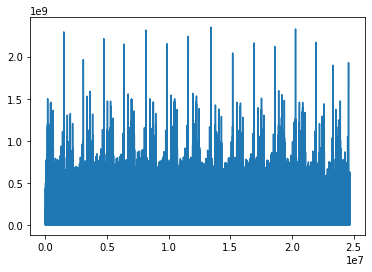

In [ ]:
# 패턴을 활용하여 acc를 달성할 방법이 있을 것으로 보임 
import matplotlib.pyplot as plt

plt.plot(data['AMT'])

In [ ]:
df = data.copy()
df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)
df = df.loc[df['REG_YYMM']==202003]
df = df[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]

In [ ]:
df = data.copy()
df = df[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df = df.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)
df = df.loc[df['REG_YYMM']==202003]
df = df[['CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]

submission = pd.read_csv('submission.csv', index_col=0)
submission = submission.loc[submission['REG_YYMM']==202004]
submission = submission[['CARD_SIDO_NM', 'STD_CLSS_NM']]
submission = submission.merge(df, left_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission = submission.fillna(0)
AMT = list(np.expm1(np.log1p(submission.AMT.values+1)))*2

submission = pd.read_csv('submission.csv', index_col=0)
submission['AMT'] = AMT
submission.to_csv('dacon_submission.csv', encoding='utf-8-sig')
submission.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
id,,,,
0,202004,강원,건강보조식품 소매업,9.605901e+07
1,202004,강원,골프장 운영업,2.915798e+09
2,202004,강원,과실 및 채소 소매업,9.948169e+08
3,202004,강원,관광 민예품 및 선물용품 소매업,1.331730e+07
4,202004,강원,그외 기타 분류안된 오락관련 서비스업,1.000000e+00
